In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import seaborn as sb

In [53]:
df_unrate = pd.read_csv('UNRATE.csv')
df_crude = pd.read_csv('SPDYNCBRTINUSA.csv')
df_GDP = pd.read_csv('GDPC1.csv')
df_crude.rename ({'SPDYNCBRTINUSA' : 'Crude_birth'} , axis = 1, inplace = True)
print(df_crude.head())
df_unrate.head()
print(df_unrate.shape)
df_GDP.rename ({'GDPC1' : 'GDP'} , axis = 1, inplace = True)
df_GDP.tail()
df_pop = pd.read_csv('POPTHM.csv')
df_pop.rename ({'POPTHM' : 'population'} , axis = 1, inplace = True)
df_pop.head()
df_women = pd.read_csv('LNS11300002.csv')
df_women.tail()
df_women.rename ({'LNS11300002' : 'women labor rate'} , axis = 1, inplace = True)

         DATE  Crude_birth
0  1960-01-01         23.7
1  1961-01-01         23.3
2  1962-01-01         22.4
3  1963-01-01         21.7
4  1964-01-01         21.1
(920, 2)


In [54]:
df = pd.merge(df_crude, df_unrate, how = "left", on = "DATE")
df_new = pd.merge(df_GDP, df_unrate, how = "left", on = "DATE")
df_new = pd.merge(df_new, df_pop, how = "left", on = "DATE")
df_new = pd.merge(df_new, df_women, how = "left", on = "DATE")
df_new.dropna(subset=['population'], inplace=True)
print(df_new.isna().sum())


DATE                0
GDP                 0
UNRATE              0
population          0
women labor rate    0
dtype: int64


In [55]:
print(df_new.isnull().sum())
df_new['GDP_percap(mil)'] = (df_new['GDP']*(10**9))/df_new['population']/(10**6)
df_new.head()


DATE                0
GDP                 0
UNRATE              0
population          0
women labor rate    0
dtype: int64


,DATE,GDP,UNRATE,population,women labor rate,GDP_percap(mil)
48,1959-01-01,3352.129,6.0,175818.0,37.1,19.065903
49,1959-04-01,3427.667,5.2,176503.0,37.3,19.419880
50,1959-07-01,3430.057,5.1,177208.0,37.1,19.356107
51,1959-10-01,3439.832,5.7,178026.0,37.4,19.322077
52,1960-01-01,3517.181,5.2,178925.0,37.0,19.657292


In [5]:
df['DATE'] = pd.to_datetime(df['DATE'])

Text(0.5, 1.0, 'Crude Birth Rate Over Time')

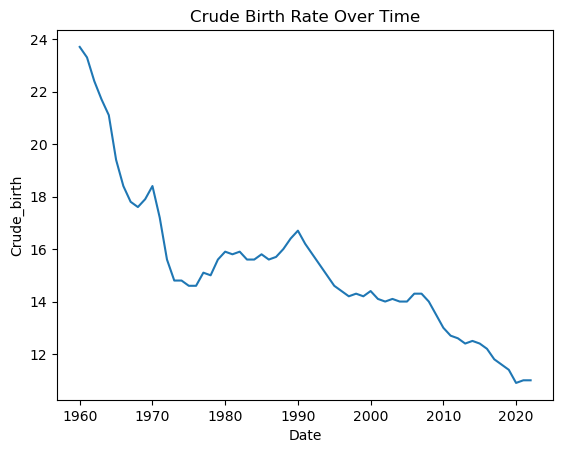

In [6]:
plt.plot(df['DATE'], df['Crude_birth'])
plt.xlabel("Date")
plt.ylabel("Crude_birth")
plt.title("Crude Birth Rate Over Time")

(array([-3.1       ,  4.47777778, 12.05555556, 19.63333333, 27.21111111,
        34.78888889, 42.36666667, 49.94444444, 57.52222222, 65.1       ]),
 [Text(-3.1, 0, ''),
  Text(4.477777777777776, 0, '1964-01-01'),
  Text(12.055555555555554, 0, '1972-01-01'),
  Text(19.63333333333333, 0, '1980-01-01'),
  Text(27.211111111111105, 0, '1987-01-01'),
  Text(34.788888888888884, 0, '1995-01-01'),
  Text(42.36666666666666, 0, '2002-01-01'),
  Text(49.944444444444436, 0, '2010-01-01'),
  Text(57.52222222222221, 0, '2018-01-01'),
  Text(65.1, 0, '')])

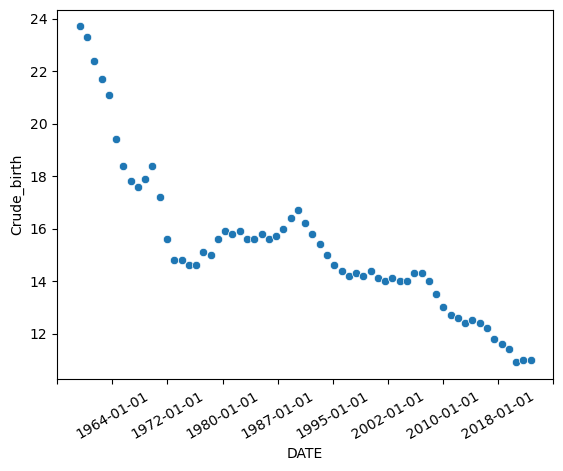

In [7]:
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
plot = sb.scatterplot(data = df_crude, x = "DATE", y = "Crude_birth")
plot.xaxis.set_major_locator(ticker.LinearLocator(10))
plt.xticks(rotation = 30)

Text(0.5, 1.0, 'Unemployment Rate Over Time')

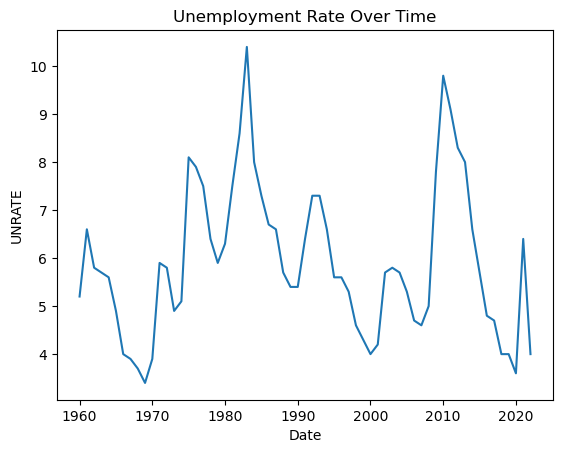

In [8]:
plt.plot(df['DATE'], df['UNRATE'])
plt.xlabel("Date")
plt.ylabel("UNRATE")
plt.title("Unemployment Rate Over Time")

Text(0.5, 1.0, 'Effects of crude birth rate on the unemployment rate')

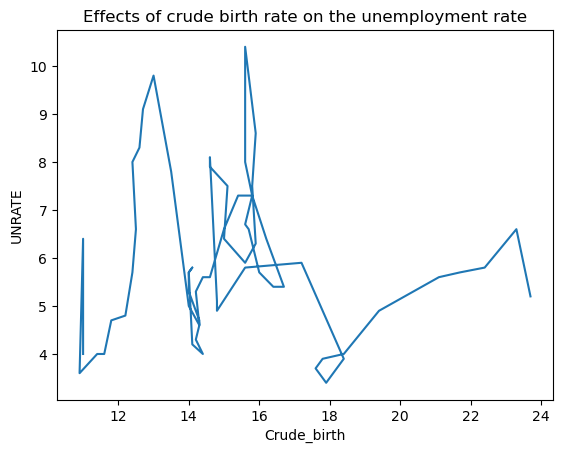

In [9]:
plt.plot(df['Crude_birth'], df['UNRATE'])
plt.xlabel("Crude_birth")
plt.ylabel("UNRATE")
plt.title("Effects of crude birth rate on the unemployment rate")

<Axes: xlabel='Crude_birth', ylabel='UNRATE'>

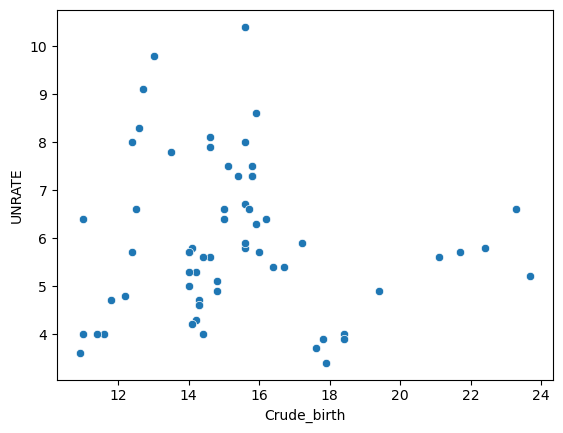

In [10]:
sb.scatterplot(data = df, x = "Crude_birth", y = "UNRATE")


In [11]:
crude_mean= df["Crude_birth"].mean()
df["Crude_SD"] = (((df['Crude_birth']-crude_mean)**2).mean())**(1/2)
df["Crude_Z"] = (df["Crude_birth"]-crude_mean)/(df["Crude_SD"])
print(df.tail())

         DATE  Crude_birth  UNRATE  Crude_SD   Crude_Z
58 2018-01-01         11.6     4.0    2.8095 -1.319220
59 2019-01-01         11.4     4.0    2.8095 -1.390407
60 2020-01-01         10.9     3.6    2.8095 -1.568375
61 2021-01-01         11.0     6.4    2.8095 -1.532781
62 2022-01-01         11.0     4.0    2.8095 -1.532781


<Axes: xlabel='DATE', ylabel='Crude_Z'>

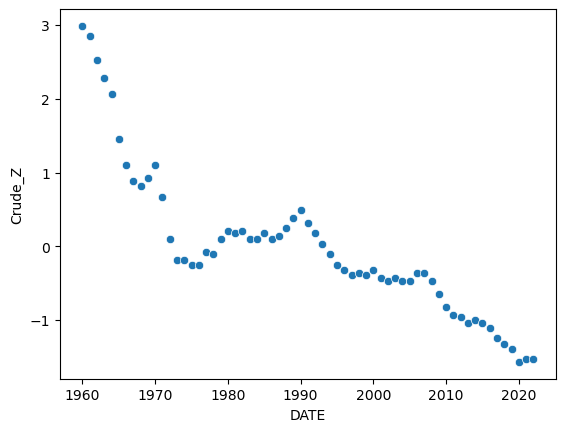

In [12]:
sb.scatterplot(data = df, x = "DATE", y = "Crude_Z")

Text(0.5, 1.0, 'Unemployement rate vs GDP per capita')

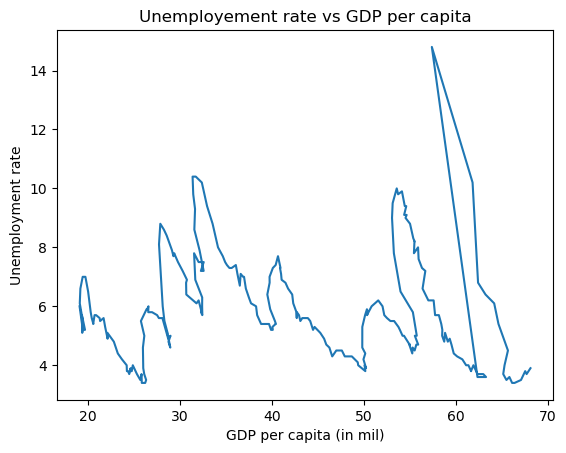

In [49]:
plt.plot(df_new['GDP_percap(mil)'], df_new['UNRATE'])
plt.ylabel("Unemployment rate")
plt.xlabel("GDP per capita (in mil)")
plt.title("Unemployement rate vs GDP per capita")

<Axes: xlabel='UNRATE', ylabel='GDP_percap(mil)'>

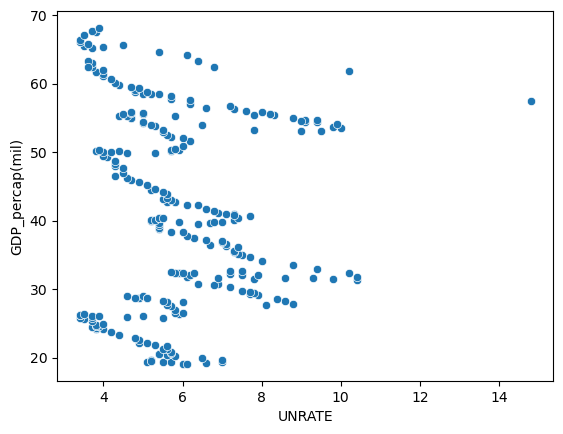

In [50]:
sb.scatterplot(data = df_new, x = "UNRATE", y = "GDP_percap(mil)")

Text(0.5, 1.0, 'Women labor rate vs GDP per capita')

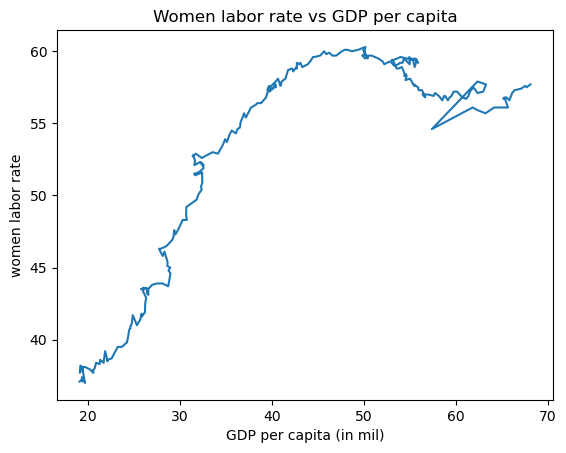

In [56]:
plt.plot(df_new['GDP_percap(mil)'], df_new['women labor rate'])
plt.ylabel("women labor rate")
plt.xlabel("GDP per capita (in mil)")
plt.title("Women labor rate vs GDP per capita")

<Axes: xlabel='GDP_percap(mil)', ylabel='women labor rate'>

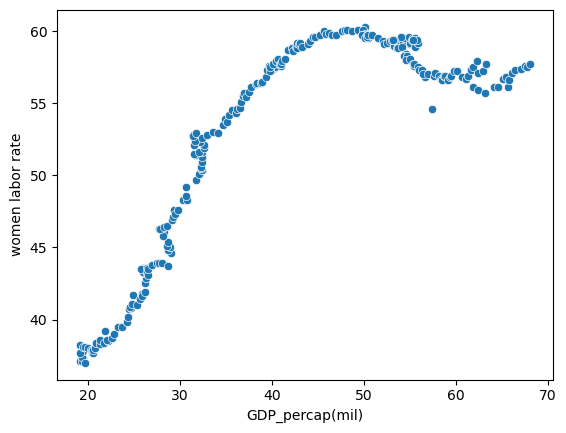

In [58]:
sb.scatterplot(data = df_new, y = "women labor rate", x = "GDP_percap(mil)")